# First Example: Decoherence in Superconducting Qubits: T1 Simulation

This notebook simulates **T1 decoherence**, also known as **energy relaxation**, in a superconducting qubit using the **Lindblad master equation**. The goal is to model how an excited qubit spontaneously loses energy to its environment and decays toward the ground state, a fundamental limitation in quantum hardware performance.

## What Is a Superconducting Qubit?

A **superconducting qubit** is a quantum bit made from superconducting circuits cooled to millikelvin temperatures. It behaves like an artificial atom, where quantum information is stored in discrete energy levels of a nonlinear oscillator.

These qubits are built from Josephson junctions non-linear, non-dissipative circuit elements and can be controlled using microwave pulses to perform quantum operations.

Despite their advantages, they are vulnerable to **decoherence** from environmental noise and material imperfections — motivating the kind of simulations done in this project.

## What is T1?

T1, or **longitudinal relaxation time**, describes how quickly a qubit loses energy and returns to its ground state |0⟩ after being excited to the |1⟩ state.

- Physically, this represents processes like **spontaneous emission**, **microwave photon leakage**, or interactions with **two-level system (TLS) defects**.
- In superconducting circuits, T1 is often limited by **dielectric losses**, **quasiparticle tunneling**, or **TLS absorption in Josephson junctions**.

The higher the T1, the longer the qubit remains coherent so it's a key **figure of merit** for quantum hardware.

---

## Project Purpose

- Simulate **open quantum system dynamics** using the Lindblad formalism
- Model T1 decay from first principles
- Visualize how a qubit initially in |1⟩ transitions back to |0⟩
- Lay the foundation for adding more realistic decoherence mechanisms like **T2 dephasing** and **TLS-induced noise**

---

## Physics in the Code

The dynamics of the qubit's state ρ(t) are governed by the **Lindblad master equation**:

\\[
\frac{d\rho}{dt} = -i[H, \rho] + \sum_k \left( L_k \rho L_k^\dagger - \frac{1}{2} \{L_k^\dagger L_k, \rho\} \right)
\\]

Where:
- ρ(t) is the density matrix
- \\( L_k \\) are **collapse operators** modeling interaction with the environment

In this case:
- \\( H = 0 \\): no Hamiltonian dynamics (no gate operation)
- \\( L = \sqrt{\gamma} \cdot \sigma^- \\): spontaneous emission via lowering operator

---

##  Simulation Setup

- **Initial state**: |1⟩ (the excited state)
- **Collapse operator**:  
  \\[
  L = \sqrt{1/T_1} \cdot \sigma^- = \sqrt{\gamma} \cdot 
  \begin{pmatrix}
  0 & 1 \\
  0 & 0 \\
  \end{pmatrix}
  \\]
- Time evolution is simulated using QuTiP's `mesolve()` function
- We track the **expectation value of σ_z**:  
  \\[
  \langle Z \rangle(t) = \text{Tr}[\rho(t) \cdot \sigma_z]
  \\]
  which transitions from +1 (pure |1⟩) toward -1 (pure |0⟩)

## Why Track the Expectation Value of σ<sub>z</sub>?

The **expectation value of σ<sub>z</sub>** (written ⟨σ<sub>z</sub>⟩) tells us how much probability is in the qubit's excited state |1⟩ versus the ground state |0⟩ during its time evolution.

In the standard computational basis:
- ⟨σ<sub>z</sub>⟩ = +1 → the qubit is entirely in the excited state |1⟩
- ⟨σ<sub>z</sub>⟩ = −1 → the qubit is entirely in the ground state |0⟩
- ⟨σ<sub>z</sub>⟩ = 0 → the qubit is in an equal superposition of |0⟩ and |1⟩

---

###  In the Context of T1 Relaxation

T1 processes (energy relaxation) cause the qubit to decay from the excited state |1⟩ to the ground state |0⟩ over time. As this happens, the ⟨σ<sub>z</sub>⟩ value transitions smoothly:

\\[
⟨σ_z⟩: +1 \longrightarrow -1
\\]

This behavior allows us to:
- **Visualize population decay**
- **Estimate the T1 time constant**
- **Verify correctness of the decoherence model**

By plotting ⟨σ<sub>z</sub>⟩ as a function of time, we get a clear picture of how the qubit relaxes a core benchmark in evaluating quantum hardware performance.


### 🔍 In the Context of T1 Relaxation

When a qubit decays from |1⟩ to |0⟩ (T1 process), ⟨σ_z⟩ smoothly transitions:
\\[
⟨σ_z⟩: +1 \rightarrow -1
\\]

This decay curve **quantifies how fast the qubit loses energy**, and lets us extract or validate the T₁ time constant experimentally or in simulation.

So, tracking ⟨σ_z⟩ is a direct, intuitive way to **monitor population decay** and verify the physical correctness of the decoherence model.


---

## What You Will See

- A smooth exponential decay of ⟨Z⟩ from +1 to -1
- This reflects how a real qubit **loses energy** over time due to environmental coupling
- This is crucial for benchmarking **coherence times** in real quantum processors

---

## Relevance to Quantum Hardware

Modeling T1 allows researchers and engineers to:
- Estimate **coherence limits** in superconducting qubits
- Understand how material choices (e.g., TLS in junctions) impact reliability
- Build more accurate **noise-aware simulators** for quantum algorithms
- Guide **hardware optimization** efforts to improve quantum error correction thresholds

---

 Next Step: Extend this model to include **T2 dephasing** and simulate **Bloch vector shrinkage** in the XY plane.



Initial ⟨σz⟩ values: [-1.         -0.98000017 -0.96020033 -0.9405985  -0.92119268]


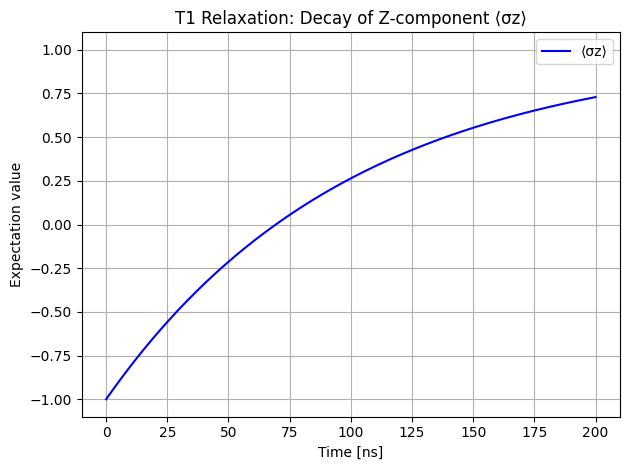

In [3]:
from qutip import basis, Qobj, sigmaz, mesolve
import numpy as np
import matplotlib.pyplot as plt

# T1 relaxation time and decay rate
T1 = 100.0
gamma = 1.0 / T1
tlist = np.linspace(0, 200, 200)

# Initial state: excited state |1⟩
psi0 = basis(2, 1)

# Zero Hamiltonian
H = Qobj(np.zeros((2, 2)))

# Manually define lowering operator: |0⟩⟨1|
lowering_op = Qobj([[0, 1],
                    [0, 0]])

# Scale it for the collapse operator
c_ops = [np.sqrt(gamma) * lowering_op]

# Solve master equation
result = mesolve(H, psi0, tlist, c_ops=c_ops, e_ops=[sigmaz()])
expt_z = result.expect[0]

# Print for verification
print("Initial ⟨σz⟩ values:", expt_z[:5])

# Plot the result
plt.plot(tlist, expt_z, label='⟨σz⟩', color='blue')
plt.xlabel('Time [ns]')
plt.ylabel('Expectation value')
plt.title('T1 Relaxation: Decay of Z-component ⟨σz⟩')
plt.ylim(-1.1, 1.1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


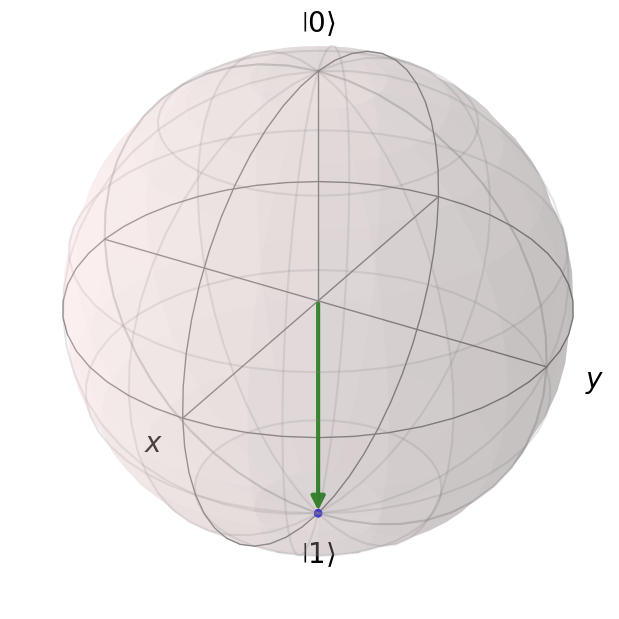

In [2]:
from qutip import basis, Qobj, sigmax, sigmay, sigmaz, mesolve, Bloch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# T1 relaxation parameters
T1 = 100.0
gamma = 1.0 / T1
tlist = np.linspace(0, 200, 60)

# Initial state: excited state |1⟩
psi0 = basis(2, 1)

# Zero Hamiltonian
H = Qobj(np.zeros((2, 2)))

# Manually define lowering operator: |0⟩⟨1|
lowering_op = Qobj([[0, 1],
                    [0, 0]])

# Collapse operator for T1
c_ops = [np.sqrt(gamma) * lowering_op]

# Solve for ⟨X⟩, ⟨Y⟩, ⟨Z⟩
result = mesolve(H, psi0, tlist, c_ops=c_ops,
                 e_ops=[sigmax(), sigmay(), sigmaz()])
x, y, z = result.expect

# Set up Bloch sphere
b = Bloch()
b.vector_color = ['darkblue']
fig = plt.figure(figsize=(6, 6))
b.fig = fig

def update_bloch(i):
    b.clear()
    b.add_vectors([x[i], y[i], z[i]])            # Show current state
    b.add_points([x[:i+1], y[:i+1], z[:i+1]])     # Add trajectory
    b.render()
    return b.fig.artists

# Create animation
ani = animation.FuncAnimation(fig, update_bloch, frames=len(tlist), interval=150, blit=False)
ani.save("t1_relaxation_bloch.gif", writer="pillow", fps=10)


# Second Example: T2 Decoherence in Superconducting Qubits: Dephasing Simulation

This notebook simulates **T2 decoherence**, also known as **pure dephasing**, in a superconducting qubit using the **Lindblad master equation**.

## Purpose of This Simulation

- To model **phase decoherence**  where a qubit loses superposition without energy loss.
- To visualize how the **coherence of a quantum state** fades over time in the **XY-plane** of the Bloch sphere.
- To quantify the decay of ⟨σ<sub>x</sub>⟩ and ⟨σ<sub>y</sub>⟩ due to environmental noise, while ⟨σ<sub>z</sub>⟩ stays unchanged.
- To simulate how **material defects**, **magnetic flux noise**, and **charge fluctuations** in superconducting circuits degrade quantum information.


## What Is T2 Dephasing?

T2 describes the time scale over which a qubit loses **phase coherence** between |0⟩ and |1⟩ without changing the population.

In this process:
- The off-diagonal elements of the density matrix decay (i.e., the qubit forgets its phase).
- It affects qubits in **superposition states** (e.g., |+⟩ = (|0⟩ + |1⟩)/√2).
- T2 processes are dominant in many superconducting qubit systems due to **low-frequency noise** and **coupling to fluctuating environments**.


## Key Physics

We model the dynamics using the **Lindblad master equation**, where the collapse operator is:

\\[
L = \sqrt{1/T_2} \cdot \sigma_z
\\]

This operator represents **pure dephasing**, and causes ⟨X⟩ and ⟨Y⟩ components of the qubit to decay, while leaving the population ⟨Z⟩ unchanged.

## Why Does T2 Dephasing Affect ⟨X⟩ and ⟨Y⟩ But Not ⟨Z⟩?

### What ⟨σ<sub>z</sub>⟩ Represents

⟨σ<sub>z</sub>⟩ measures the **population imbalance** between the states |0⟩ and |1⟩:

- ⟨σ<sub>z</sub>⟩ = +1 → qubit is fully in |1⟩  
- ⟨σ<sub>z</sub>⟩ = −1 → qubit is fully in |0⟩  
- ⟨σ<sub>z</sub>⟩ = 0 → equal population (e.g., in a |+⟩ superposition)

T2 **does not affect these populations**. It only affects **quantum phase information**, not energy levels.


### What ⟨σ<sub>x</sub>⟩ and ⟨σ<sub>y</sub>⟩ Represent

These components measure the **coherence** or **quantum interference** between |0⟩ and |1⟩:

- ⟨σ<sub>x</sub>⟩ and ⟨σ<sub>y</sub>⟩ are nonzero when the qubit is in a **superposition state** (e.g., |+⟩ or |−i⟩)
- They are derived from the **off-diagonal terms** of the density matrix:
  \\[
  \rho = \begin{bmatrix}
  \rho_{00} & \rho_{01} \\
  \rho_{10} & \rho_{11}
  \end{bmatrix}
  \\]
  where:
  - ⟨σ<sub>x</sub>⟩ ∝ Re(ρ<sub>01</sub>)  
  - ⟨σ<sub>y</sub>⟩ ∝ Im(ρ<sub>01</sub>)

---

### What Pure Dephasing Does (T2)

T2 processes **destroy phase coherence** without changing the population:

- The **off-diagonal elements** ρ<sub>01</sub> and ρ<sub>10</sub> decay exponentially to 0
- The **diagonal elements** (probabilities) remain constant

So the qubit becomes **classical** over time it still "knows" if it's in |0⟩ or |1⟩, but has **forgotten its phase**.

---

### On the Bloch Sphere

- ⟨X⟩ and ⟨Y⟩ components **shrink toward 0**
- ⟨Z⟩ stays fixed (no energy loss)
- The Bloch vector collapses into a vertical line along the Z-axis

This is the signature of **dephasing without relaxation**.

---

### Summary Table

| Component | Affected by T2? | Why |
|-----------|------------------|-----|
| ⟨σ<sub>z</sub>⟩      | ❌ No              | Populations remain constant |
| ⟨σ<sub>x</sub>⟩, ⟨σ<sub>y</sub>⟩ | ✅ Yes             | Phase coherence is destroyed (off-diagonal decay) |


## What We Should Expect

- Start with a **superposition state** (like |+⟩)
- ⟨σ<sub>x</sub>⟩ and ⟨σ<sub>y</sub>⟩ will decay to 0 over time
- ⟨σ<sub>z</sub>⟩ remains constant (e.g., 0 if in |+⟩)

This reflects the real-world challenge of maintaining quantum coherence in superconducting qubit devices.


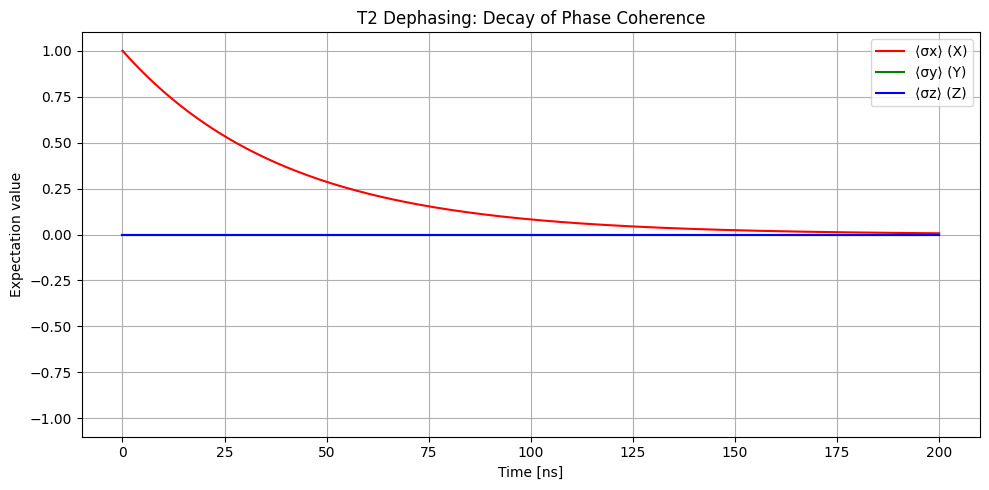

In [1]:
# Import required libraries
from qutip import basis, sigmax, sigmay, sigmaz, Qobj, mesolve
import numpy as np
import matplotlib.pyplot as plt

# Set T2 dephasing parameters
T2 = 80.0                     # T2 time in nanoseconds
gamma_phi = 1.0 / T2          # Pure dephasing rate
tlist = np.linspace(0, 200, 200)  # Time array from 0 to 200 ns

# Initial state: |+⟩ = (|0⟩ + |1⟩) / √2 — superposition in the XY-plane
psi0 = (basis(2, 0) + basis(2, 1)).unit()

#  Hamiltonian = 0 → no unitary evolution (pure dephasing only)
H = Qobj(np.zeros((2, 2)))

# Collapse operator for pure dephasing: √γ * σ_z
# Physically models random phase kicks without energy loss
c_ops = [np.sqrt(gamma_phi) * sigmaz()]

# Solve the Lindblad master equation
# Track ⟨X⟩, ⟨Y⟩, ⟨Z⟩ over time
result = mesolve(H, psi0, tlist, c_ops=c_ops,
                 e_ops=[sigmax(), sigmay(), sigmaz()])

# Extract expectation values for Bloch components
expt_x, expt_y, expt_z = result.expect

# Plot all three Bloch components
plt.figure(figsize=(10, 5))
plt.plot(tlist, expt_x, label='⟨σx⟩ (X)', color='red')
plt.plot(tlist, expt_y, label='⟨σy⟩ (Y)', color='green')
plt.plot(tlist, expt_z, label='⟨σz⟩ (Z)', color='blue')

plt.xlabel('Time [ns]')
plt.ylabel('Expectation value')
plt.title('T2 Dephasing: Decay of Phase Coherence')
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
pip install qutip matplotlib pillow


Note: you may need to restart the kernel to use updated packages.


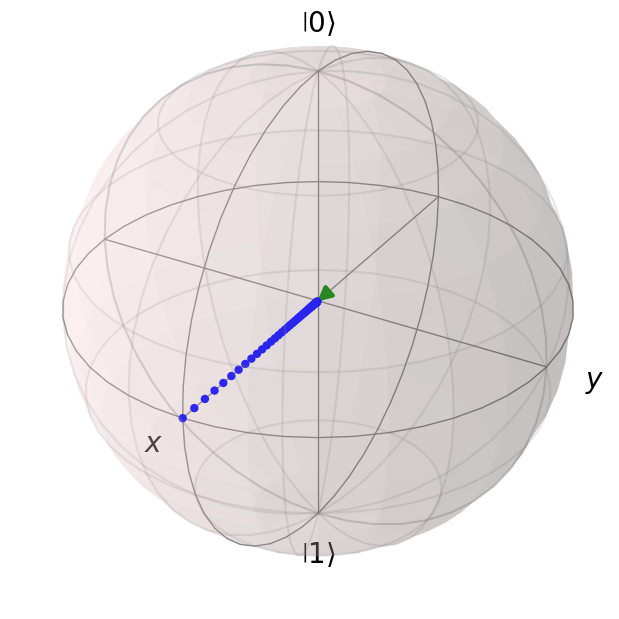

In [4]:
from qutip import Bloch, basis, sigmaz, sigmax, sigmay, Qobj, mesolve
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Parameters
T2 = 80.0
gamma_phi = 1.0 / T2
tlist = np.linspace(0, 200, 60)

# Initial state |+⟩
psi0 = (basis(2, 0) + basis(2, 1)).unit()

# Zero Hamiltonian
H = Qobj(np.zeros((2, 2)))

# Collapse operator for dephasing
c_ops = [np.sqrt(gamma_phi) * sigmaz()]

# Solve master equation
result = mesolve(H, psi0, tlist, c_ops=c_ops, e_ops=[sigmax(), sigmay(), sigmaz()])
x, y, z = result.expect

# Setup Bloch sphere
b = Bloch()
b.vector_color = ['r']
fig = plt.figure(figsize=(6, 6))
b.fig = fig

def update_bloch(i):
    b.clear()
    b.add_vectors([x[i], y[i], z[i]])                # Current Bloch vector
    b.add_points([x[:i+1], y[:i+1], z[:i+1]])         # Trajectory
    b.render()                                       # Correct way to update the axes
    return b.fig.artists                             # Return artists for blitting



# Animate
ani = animation.FuncAnimation(fig, update_bloch, frames=len(tlist), interval=150, blit=True)
ani.save("t2_dephasing_bloch.gif", writer="pillow", fps=10)


## Physical Concept: T2 Dephasing and the Loss of Quantum Coherence

This animation visualizes **T2 dephasing** on the Bloch sphere for a superconducting qubit initially in the |+⟩ state (a superposition of |0⟩ and |1⟩).

In the absence of energy relaxation (T1 = ∞), the qubit retains its population distribution but **loses phase information** due to environmental noise such as low-frequency charge, flux, or TLS fluctuations.

This process is described by the **Lindblad master equation** with a dephasing collapse operator:
\\[
L = \sqrt{1/T_2} \cdot \sigma_z
\\]


## What the Animation Shows

- The qubit starts on the **X-axis** of the Bloch sphere (state |+⟩)
- Over time, the Bloch vector **shrinks toward the Z-axis**
- The vector’s length decreases, indicating the loss of **quantum coherence**
- The Z-component remains at **⟨σ<sub>z</sub>⟩ = 0**, meaning **no population change**


## Conclusion

This simulation confirms that **T2 decoherence** leads to:
- **Exponential decay** of ⟨X⟩ and ⟨Y⟩
- **No change** in ⟨Z⟩ (population)
- A transformation from a **pure superposition state** to a **classical probabilistic mixture**

Maintaining long T2 times is essential for quantum computing, as it determines how long a qubit can **retain useful quantum information** before becoming indistinguishable from noise.


## Third Example: Simulating Combined T1 and T2 Decoherence

In this simulation, we model the combined effects of **T1 relaxation** and **T2 dephasing** on a superconducting qubit using the Lindblad master equation.

- **T1 (energy relaxation)** causes the qubit to decay from the excited state |1⟩ to the ground state |0⟩ over time.
- **T2 (dephasing)** causes loss of phase coherence in superpositions like |+⟩ or |−i⟩, even without energy loss.

We start with the qubit in the **|+⟩ = (|0⟩ + |1⟩)/√2** state, which lies on the equator of the Bloch sphere. This allows us to observe the effects of both T1 and T2:

- ⟨X⟩ and ⟨Y⟩ decay due to **T2**
- ⟨Z⟩ decays toward −1 due to **T1**

We use QuTiP’s master equation solver to simulate this process and track how the **Bloch vector components** evolve over time.


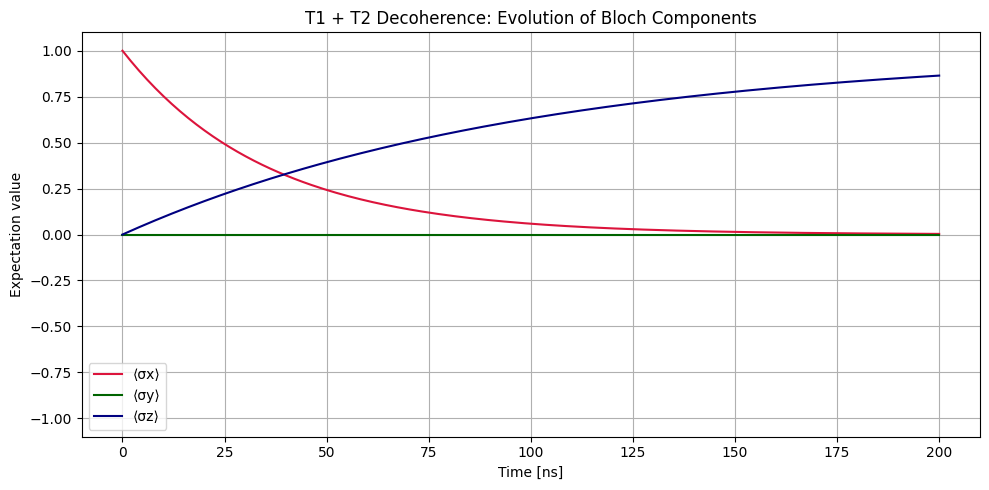

In [8]:
# Import required libraries
from qutip import basis, sigmax, sigmay, sigmaz, Qobj, mesolve, destroy
import numpy as np
import matplotlib.pyplot as plt

# Define T1 and T2 times (in nanoseconds)
T1 = 100.0       # Energy relaxation time
T2 = 60.0        # Total decoherence time

# Convert to decay rates
gamma_relax = 1.0 / T1                            # T1 relaxation rate
gamma_dephase = 1.0 / T2 - 0.5 * gamma_relax      # Pure T2 dephasing rate

# Define time range for simulation
tlist = np.linspace(0, 200, 200)  # from 0 to 200 ns

# Initial state: |+⟩ = (|0⟩ + |1⟩)/√2, on the X-axis of Bloch sphere
psi0 = (basis(2, 0) + basis(2, 1)).unit()

# Zero Hamiltonian (no external control)
H = Qobj(np.zeros((2, 2)))

# Collapse operators
# T1: relaxation via lowering operator
# T2: phase damping via sigmaz
c_ops = [
    np.sqrt(gamma_relax) * destroy(2),
    np.sqrt(gamma_dephase) * sigmaz()
]

# Solve the Lindblad master equation
# Track ⟨σx⟩, ⟨σy⟩, ⟨σz⟩ over time
result = mesolve(H, psi0, tlist, c_ops=c_ops,
                 e_ops=[sigmax(), sigmay(), sigmaz()])
x, y, z = result.expect

# Plot the expectation values
plt.figure(figsize=(10, 5))
plt.plot(tlist, x, label='⟨σx⟩', color='crimson')
plt.plot(tlist, y, label='⟨σy⟩', color='darkgreen')
plt.plot(tlist, z, label='⟨σz⟩', color='navy')

plt.xlabel('Time [ns]')
plt.ylabel('Expectation value')
plt.title('T1 + T2 Decoherence: Evolution of Bloch Components')
plt.ylim(-1.1, 1.1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Conclusion: T1 + T2 Decoherence Dynamics

The plots above show how the Bloch vector evolves under simultaneous T1 and T2 noise:

- ⟨σ<sub>x</sub>⟩ and ⟨σ<sub>y</sub>⟩ decay to 0 due to **dephasing**, which erases quantum coherence
- ⟨σ<sub>z</sub>⟩ decays toward −1 due to **energy relaxation**, bringing the qubit to its ground state

Together, these two mechanisms drive the qubit from a pure superposition to a classical mixed state at |0⟩.

This combined decoherence process reflects what actually happens in real superconducting quantum hardware, where **T1 and T2 set the limits** on how long a qubit can retain useful quantum information.

Understanding and simulating these dynamics is key to developing better qubits and designing error correction strategies.
